# miRNA target and m6A target (mESC)

The targets of miRNA were annotated in TargetScan8.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
dat1 = pd.read_csv("../../1_FLAIRseq/reports/halflife_of_mESC_400uM_3h.2TC.tsv", sep="\t", index_col=0)
dat1 = dat1[dat1["GeneType"] == "protein_coding"]
dat1 = dat1[dat1["Total"] >= 10]
dat1 = dat1[(dat1["T"] > 0.5) & (dat1["T"] < 32)]
print("NanoNASC-seq genes: %d" % len(dat1))

NanoNASC-seq genes: 6143


In [3]:
dat2 = pd.read_excel("data/TargetScan8.0__miR-291-3p_294-3p_295-3p_302-3p.predicted_targets.xlsx")
targets1 = set(dat2["Target gene"])
dat2 = pd.read_excel("data/TargetScan8.0__miR-291-5p.predicted_targets.xlsx")
targets2 = set(dat2["Target gene"])
targets = targets1 | targets2
targets2 = targets2 - targets1
print(len(targets1), len(targets2))
d1 = dat1[dat1["GeneName"].isin(targets1)]
d2 = dat1[dat1["GeneName"].isin(targets2)]
d3 = dat1[~dat1["GeneName"].isin(targets)]
print("Targets1:", len(d1))
print("Targets2:", len(d2))
print("No target:", len(d3))

766 4668
Targets1: 228
Targets2: 1535
No target: 4380


228 1.1605584217036249
1535 1.8927892607143724
4380 2.2694123920980904
8.093960430142096e-20
3.648479849276452e-10


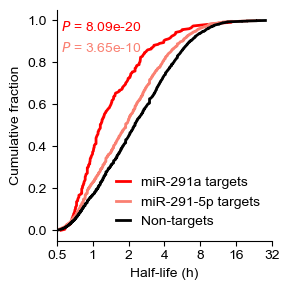

In [6]:
def get_xy(vs):
    vs = list(sorted(vs))
    xs = vs
    ys = np.arange(len(xs)) / len(xs)
    return xs, ys
    
print(len(d1["T"]), np.median(d1["T"]))
print(len(d2["T"]), np.median(d2["T"]))
print(len(d3["T"]), np.median(d3["T"]))

xs1, ys1 = get_xy(np.log2(d1["T"]))
xs2, ys2 = get_xy(np.log2(d2["T"]))
xs3, ys3 = get_xy(np.log2(d3["T"]))

p1 = ks_2samp(xs1, xs3)[1]
p2 = ks_2samp(xs2, xs3)[1]
print(p1)
print(p2)

vmin, vmax = -1, 5
plt.figure(figsize=(3, 3))
plt.plot(xs1, ys1, color="red", lw=2, label="miR-291a targets")
plt.plot(xs2, ys2, color="salmon", lw=2, label="miR-291-5p targets")
plt.plot(xs3, ys3, color="black", lw=2, label="Non-targets")
plt.text(vmin + (vmax - vmin) * 0.02, 0.95, r"$P$ = %.2e" % p1, color="red")
plt.text(vmin + (vmax - vmin) * 0.02, 0.85, r"$P$ = %.2e" % p2, color="salmon")
plt.xlabel("Half-life (h)")
plt.ylabel("Cumulative fraction")
xs = np.arange(vmin, vmax + 1)
plt.xticks(xs, [str(2**int(x)) for x in xs])
plt.xlim(vmin, vmax)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig("figures/benchmark_halflife_mESC_miR291a_target.pdf")